<a href="https://colab.research.google.com/github/1himan/Notebooks/blob/main/guides/aya_vision_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/cohere-ai/cohere-developer-experience/blob/main/notebooks/guides/aya_vision_intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Introduction to Aya Vision: A state-of-the-art open-weights vision model

Introducing Aya Vision - a state-of-the-art open-weights multimodal multilingual model.

In this notebook, we will explore the capabilities of Aya Vision, which can take text and image inputs to generates text responses.

The following links provide further details about the Aya Vision model:
- [The launch blog](https://cohere.com/blog/aya-vision)
- [Documentation](https://docs.cohere.com/docs/aya-multimodal)
- HuggingFace model page for the [32B](https://huggingface.co/CohereForAI/aya-vision-32b) and [8B](https://huggingface.co/CohereForAI/aya-vision-8b) models.

This tutorial will provide a walkthrough of the various use cases that you can build with Aya Vision. By the end of this notebook, you will have a solid understanding of how to use Aya Vision for a wide range of applications.

The list of possible use cases with multimodal models is endless, but this notebook will cover the following:
- Setup
- Question answering
- Multilingual multimodal understanding
- Captioning
- Recognizing text
- Classification
- Comparing multiple images
- Conclusion

## Setup

First, install the Cohere Python SDK and create a client.


In [7]:
%pip install cohere -q

In [23]:
import cohere
import base64

co = cohere.ClientV2(
    "g1YWe1c7oxtxAvpHU8I4iogVlROsVfOzpNWRuiAv"
)  # Get your free API key here: https://dashboard.cohere.com/api-keys

Next, let's set up a function to generate text responses, given an image and a message. It uses the Cohere API via the Chat endpoint to call the Aya Vision model.

To pass an image to the API, pass a Base64-encoded image as the `image_url` argument in the `messages` parameter. To convert and image into a Base64-encoded version, we can use the `base64` library as in this example.

In [9]:
# Define the model
model="c4ai-aya-vision-32b"

def generate_text(image_path, message):
    """
    Generate text responses from Aya Vision model based on an image and text prompt.

    Args:
        image_path (str): Path to the image file
        message (str): Text prompt to send with the image

    Returns:
        None: Prints the model's response
    """

    # Define an image in Base64-encoded format
    with open(image_path, "rb") as img_file:
        base64_image_url = f"data:image/jpeg;base64,{base64.b64encode(img_file.read()).decode('utf-8')}"

    # Make an API call to the Cohere Chat endpoint, passing the user message and image
    response = co.chat(
        model=model,
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": message},
                    {"type": "image_url", "image_url": {"url": base64_image_url}},
                ],
            }
        ],
    )

    # Print the response
    print(response.message.content[0].text)

Let's also set up a function to render images on this notebook as we go through the use cases.

Note: the images used in this notebook can be downloaded [here](https://github.com/cohere-ai/cohere-developer-experience/tree/main/notebooks/images/aya-vision)

In [10]:
from IPython.display import Image, display

def render_image(image_path):
    """
    Display an image in the notebook with a fixed width.

    Args:
        image_path (str): Path to the image file to display
    """
    display(Image(filename=image_path, width=400))

## Question answering

One of the more common use cases is question answering. Here, the model is used to answer questions based on the content of an image.

By providing an image and a relevant question, the model can analyze the visual content and generate a text response. This is particularly useful in scenarios where visual context is important, such as identifying objects, understanding scenes, or providing descriptions.

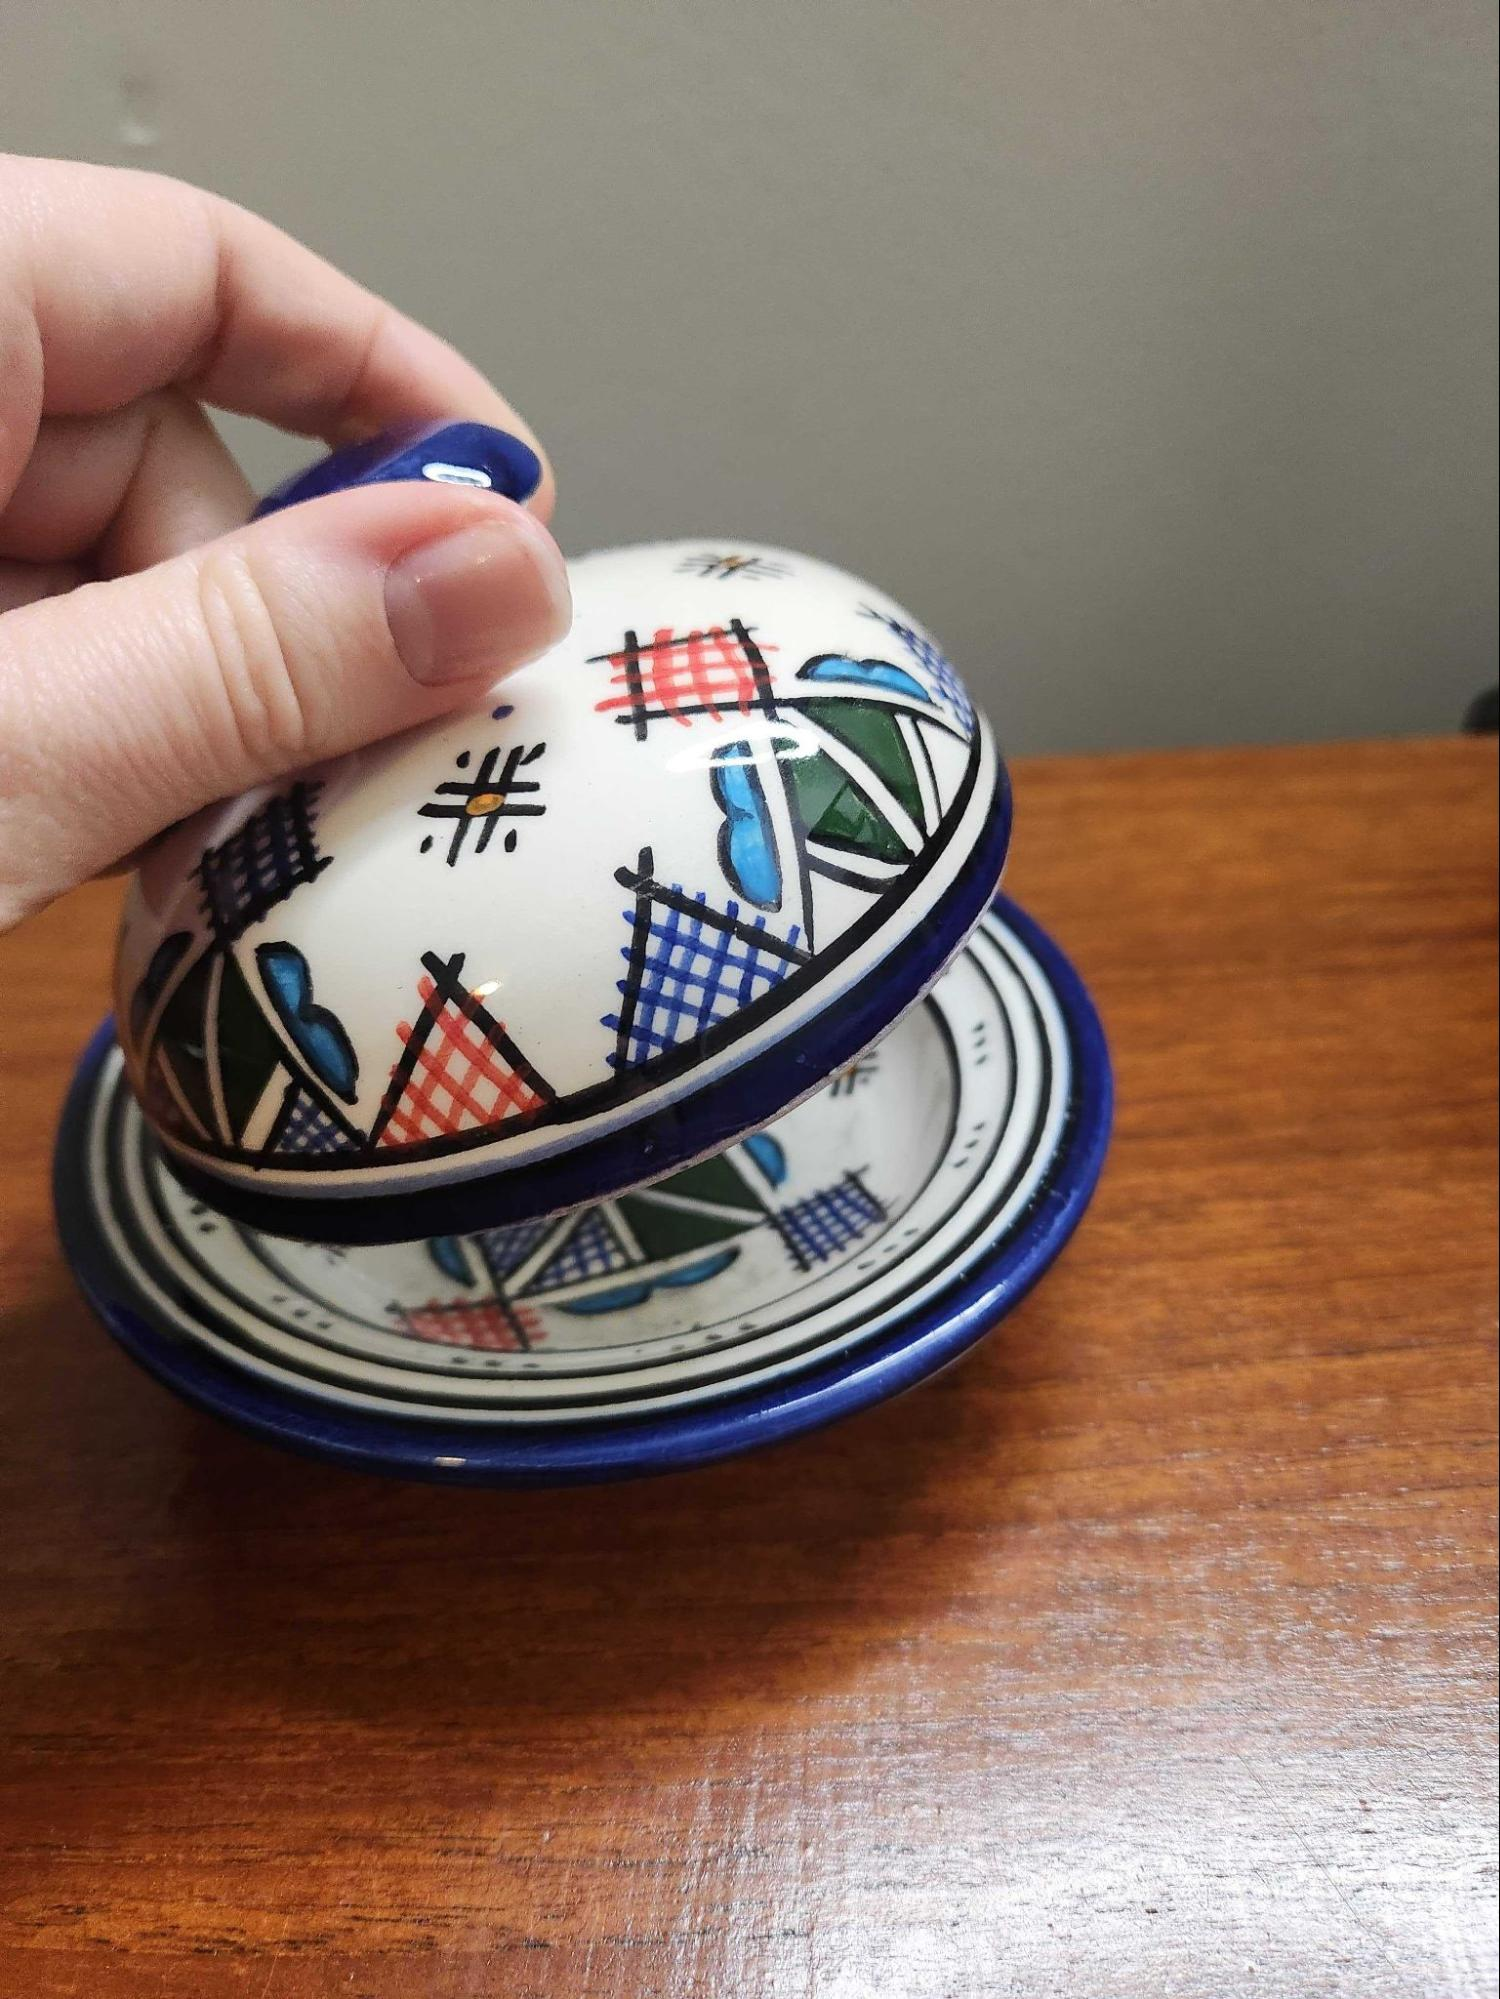

In [21]:
# !wget https://raw.githubusercontent.com/cohere-ai/cohere-developer-experience/main/notebooks/images/aya-vision/image1.jpg

image_path = "image1.jpg"
render_image(image_path)

In [24]:
message = "Where is this art style from and what is this dish typically used for?"
generate_text(image_path, message)

This dish appears to be inspired by traditional Moroccan or North African ceramic art styles. The intricate geometric patterns, bold colors, and use of blue and white are characteristic of Moroccan pottery.

Dishes like this are often used as decorative serving platters or trays for serving food. They can also function as lid-covered containers for storing dry goods or leftovers.

The specific design and size of this dish suggest it could be used for serving small portions of food or as a decorative piece to hold items like jewelry or small trinkets. The lid adds a functional element, allowing the dish to be used for storage as well as display.


## Multilingual multimodal understanding

Aya Vision can process and respond to prompts in multiple languages, demonstrating its multilingual capabilities. This feature allows users to interact with the model in their preferred language, making it accessible to a global audience. The model can analyze images and provide relevant responses based on the visual content, regardless of the language used in the query.

Here is an example in Persian:

--2025-06-06 09:10:29--  https://raw.githubusercontent.com/cohere-ai/cohere-developer-experience/main/notebooks/images/aya-vision/image2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 325449 (318K) [image/jpeg]
Saving to: ‘image2.jpg’

image2.jpg          100%[===================>] 317.82K  --.-KB/s    in 0.03s   

2025-06-06 09:10:29 (10.4 MB/s) - ‘image2.jpg’ saved [325449/325449]



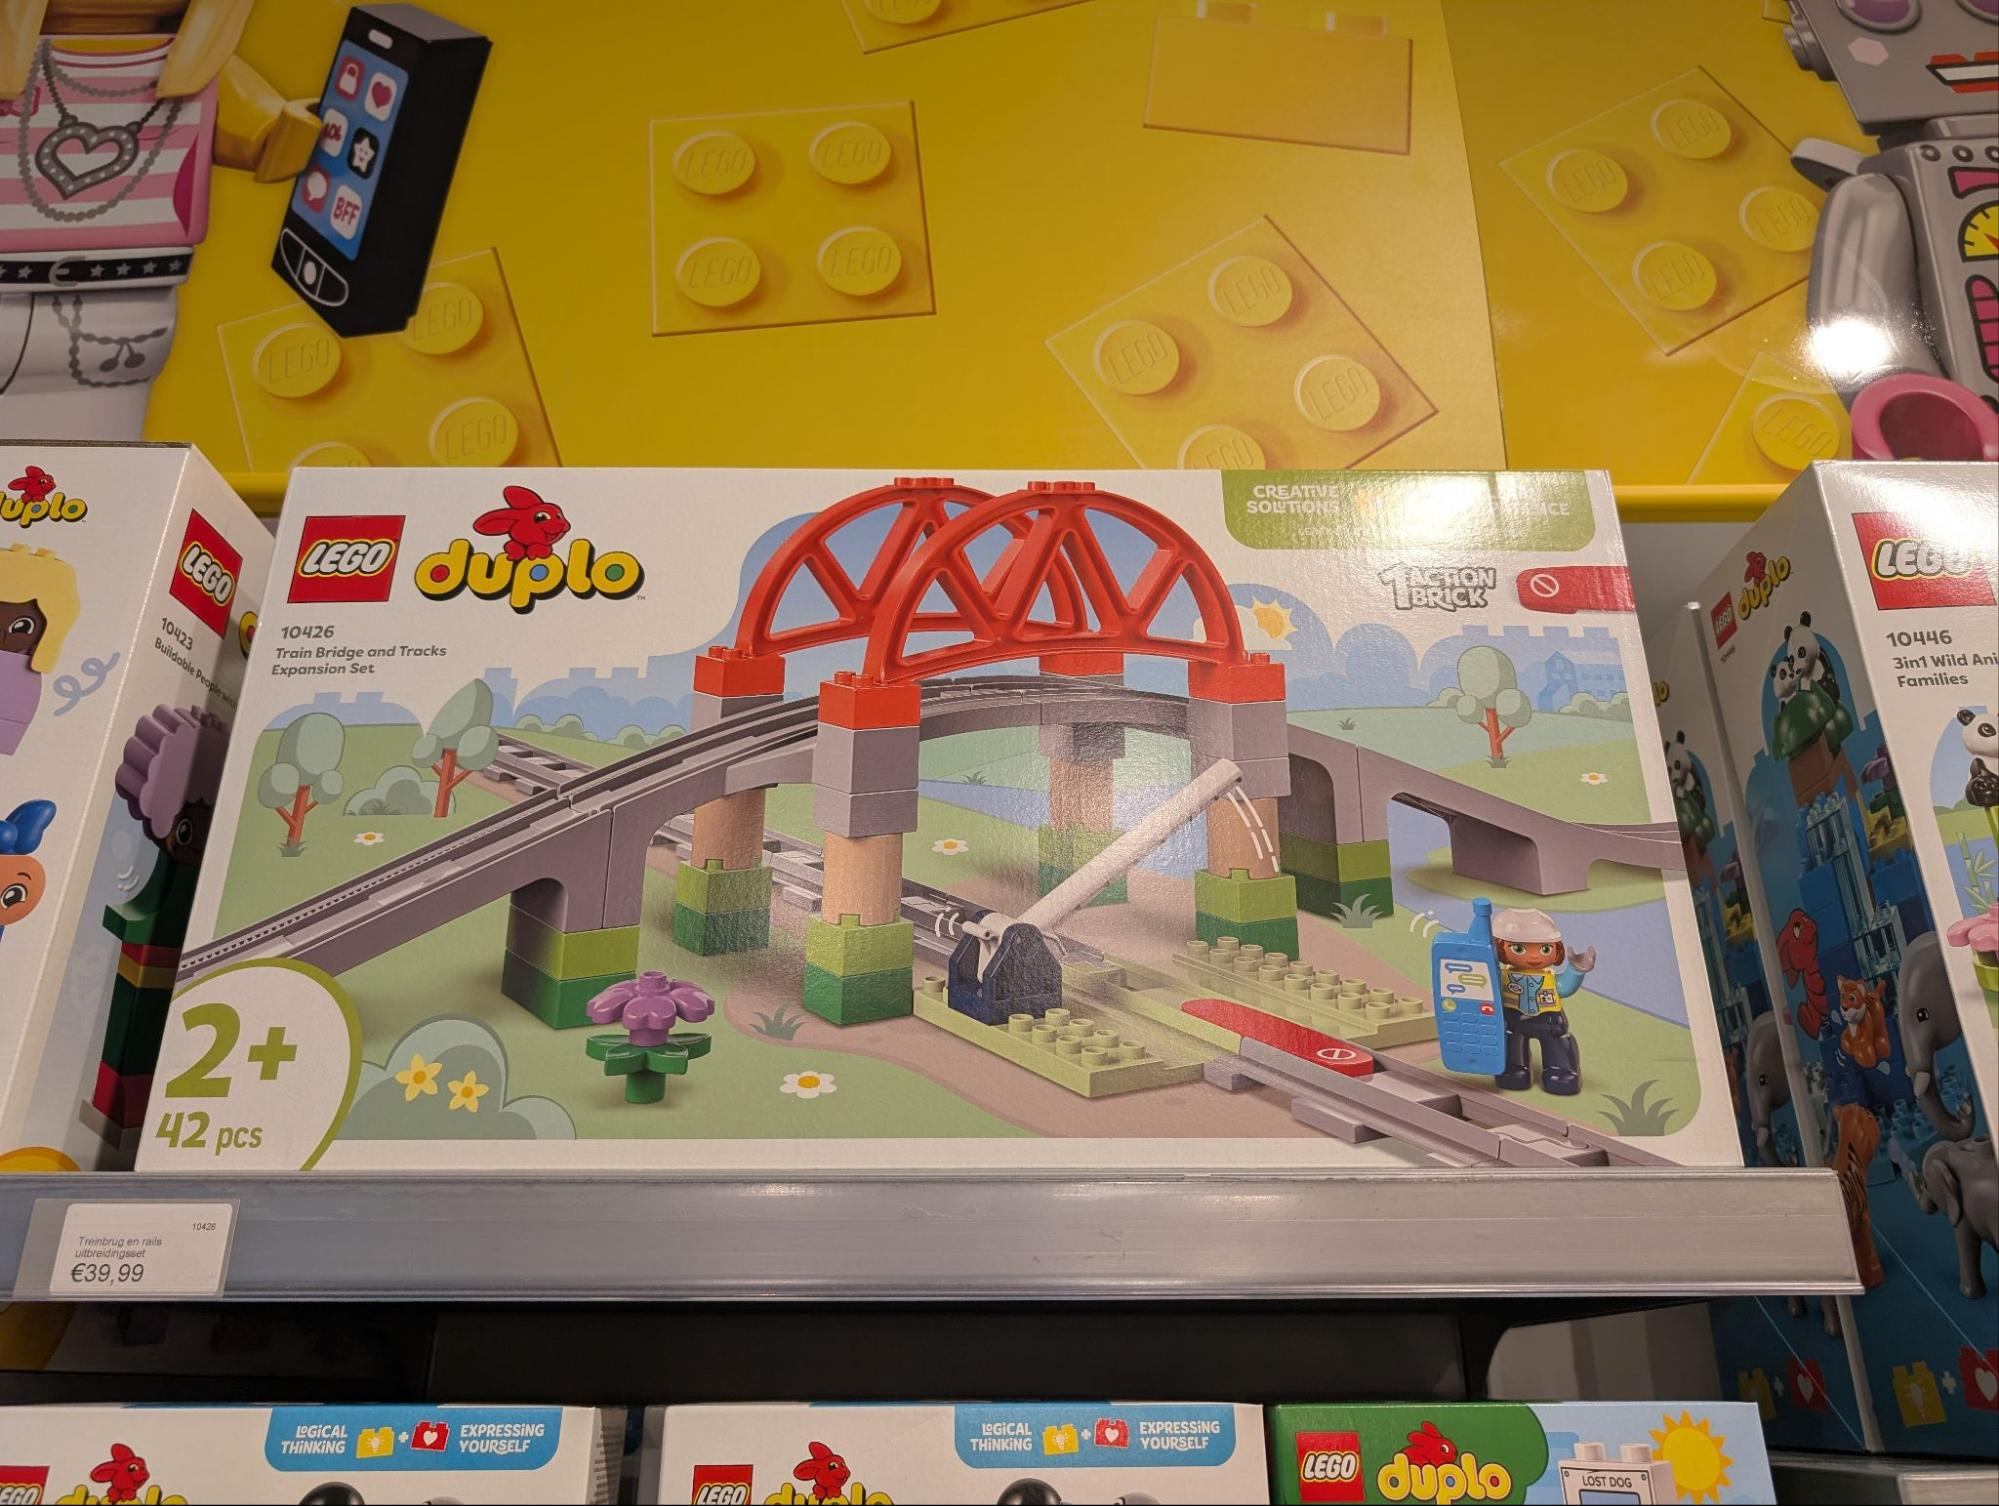

In [26]:
!wget https://raw.githubusercontent.com/cohere-ai/cohere-developer-experience/main/notebooks/images/aya-vision/image2.jpg
image_path = "image2.jpg"
render_image(image_path)

In [27]:
message = "آیا این یک هدیه مناسب برای یک کودک 3 ساله است؟"
generate_text(image_path, message)

بله، این یک هدیه مناسب برای یک کودک ۳ ساله است. این مجموعه لگو دوپلوی قطار و پل، برای کودکان ۲ ساله و بالاتر طراحی شده و شامل ۴۲ قطعه است که برای دست‌های کوچک آنها مناسب است. قطعات بزرگ و رنگارنگ آن، ساخت و ساز و بازی با آن را آسان می‌کند و به کودکان کمک می‌کند تا مهارت‌های حرکتی ظریف خود را توسعه دهند. همچنین، این اسباب‌بازی خلاقیت و تخیل کودک را تحریک می‌کند و می‌تواند به عنوان یک فعالیت سرگرم‌کننده و آموزشی برای او باشد.


And here's an example in Indonesian:

In [ ]:
image_path = "image3.jpg"
render_image(image_path)

In [ ]:
message = "Gambar ini berisikan kutipan dari tokoh nasional di Indonesia, siapakah tokoh itu?"
generate_text(image_path, message)

## Captioning

Instead of asking about specific questions, we can also get the model to provide a description of an image as a whole, be it detailed descriptions or simple captions.

This can be particularly useful for creating alt text for accessibility, generating descriptions for image databases, social media content creation, and others.

In [ ]:
image_path = "image4.jpg"
render_image(image_path)

In [ ]:
message = "Describe this image in detail."

generate_text(image_path, message)

## Recognizing text

The model can recognize and extract text from images, which is useful for reading signs, documents, or other text-based content in photographs. This capability enables applications that can answer questions about text content.

In [ ]:
image_path = "image5.jpg"
render_image(image_path)

In [ ]:
message = "How many bread rolls do I get?"

generate_text(image_path, message)

## Classification

Classification allows the model to categorize images into predefined classes or labels. This is useful for organizing visual content, filtering images, or extracting structured information from visual data.

In [ ]:
image_path1 = "image6.jpg"
image_path2 = "image7.jpg"
render_image(image_path1)
render_image(image_path2)

In [ ]:
message = "Please classify this image as one of these dish types: japanese, malaysian, turkish, or other.Respond in the following format: dish_type: <the_dish_type>."

images = [
    image_path1, # turkish
    image_path2, # japanese
]

for item in images:
    generate_text(item, message)
    print("-" * 30)

## Comparing multiple images

This section demonstrates how to analyze and compare multiple images simultaneously. The API allows passing more than one image in a single call, enabling the model to perform comparative analysis between different visual inputs.

In [ ]:
image_path1 = "image6.jpg"
image_path2 = "image7.jpg"
render_image(image_path1)
render_image(image_path2)

In [ ]:
message = "Compare these two dishes."

with open(image_path1, "rb") as img_file1:
    base64_image_url1 = f"data:image/jpeg;base64,{base64.b64encode(img_file1.read()).decode('utf-8')}"

with open(image_path2, "rb") as img_file2:
    base64_image_url2 = f"data:image/jpeg;base64,{base64.b64encode(img_file2.read()).decode('utf-8')}"

response = co.chat(
    model=model,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": message},
                {"type": "image_url", "image_url": {"url": base64_image_url1}},
                {"type": "image_url", "image_url": {"url":base64_image_url2}}
            ],
        }
    ],
)

print(response.message.content[0].text)

## Conclusion

In this notebook, we've explored the capabilities of the Aya Vision model through various examples.

The Aya Vision model shows impressive capabilities in understanding visual content and providing detailed, contextual responses. This makes it suitable for a wide range of applications including content analysis, accessibility features, educational tools, and more.

The API's flexibility in handling different types of queries and multiple images simultaneously makes it a powerful tool if you are looking to integrate advanced computer vision capabilities into your applications.